# Системы управления базами данных (СУБД)

**Системы управления базами данных (СУБД)** представляют собой специализированные программные продукты, созданные для эффективного управления и обработки данных в базах данных. СУБД предоставляют удобный и структурированный способ хранения, организации, обновления и извлечения информации, обеспечивая при этом целостность данных и безопасность их использования.

Одной из ключевых особенностей СУБД является использование языков запросов, таких как SQL (Structured Query Language), который обеспечивает стандартизированный и удобный интерфейс для взаимодействия с базой данных. СУБД могут быть различными по своей структуре и функциональности, включая реляционные, иерархические, объектно-ориентированные и другие типы систем.

Разработчики и администраторы баз данных используют СУБД для создания, изменения и управления структурой данных, а также для выполнения запросов, необходимых для получения нужной информации. СУБД играют ключевую роль в обеспечении эффективности и надежности работы с данными, что делает их неотъемлемой частью современных информационных технологий и бизнес-процессов.
   
## Определения

**База данных (БД)** - это организованная и структурированная коллекция данных, предназначенная для эффективного хранения, управления и обеспечения доступа к информации. База данных характеризуется определенной моделью данных, которая определяет формат, типы данных и отношения между ними. Ключевые характеристики базы данных включают целостность данных, консистентность, доступность и безопасность.

**Система управления базами данных (СУБД)** обеспечивает программное обеспечение для создания, обновления и запросов данных в базе данных в соответствии с заданными правилами и структурами. 

**SQL (Structured Query Language)** представляет собой специализированный язык программирования, который используется для управления и взаимодействия с реляционными базами данных. SQL состоит из различных команд и операторов, которые позволяют программистам и администраторам баз данных выполнять разнообразные задачи, такие как создание и изменение структуры таблиц, вставка, обновление и удаление данных, а также выполнение запросов для извлечения информации.

Основные категории команд SQL включают в себя **DDL (Data Definition Language)** для определения структуры данных, **DML (Data Manipulation Language)** для управления данными, и **DQL (Data Query Language)** для извлечения информации из базы данных.

# Реляционные базы данных

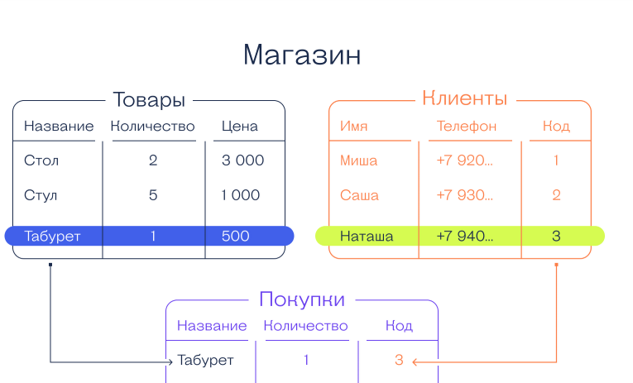

# ПО

https://www.pgadmin.org/download/

Установка postgres на Линукс: https://www.digitalocean.com/community/tutorials/how-to-install-postgresql-on-ubuntu-20-04-quickstart
    

# Типы данных в SQL

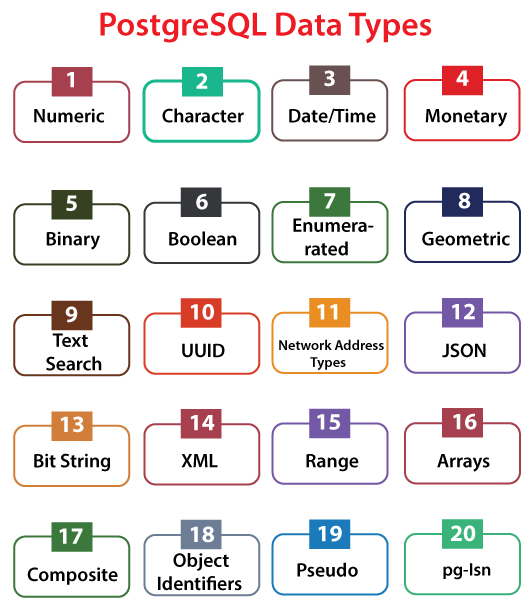

# Запросы

1. **DDL (Data Definition Language)** - язык определения данных. DDL включает команды, которые используются для определения или изменения структуры базы данных и её объектов, таких как таблицы, индексы, схемы, и т.д. Ключевые команды DDL включают:

  - `CREATE`: используется для создания новых объектов в базе данных, например, таблиц или индексов.
  - `ALTER`: позволяет изменять структуру существующих объектов.
  - `DROP`: удаляет объекты из базы данных.
  - `TRUNCATE`: быстро удаляет все строки из таблицы, освобождая место, занимаемое этими строками.
  
2. **DML (Data Manipulation Language)** - язык манипуляции данными. DML включает команды, которые используются для вставки, обновления, удаления и выборки данных из баз данных. Эти команды взаимодействуют с данными в таблицах и включают:

  - `SELECT`: извлекает данные из базы данных.
  - `INSERT`: вставляет новые данные в таблицу.
  - `UPDATE`: изменяет существующие данные в таблице.
  - `DELETE`: удаляет данные из таблицы.
  
# Описание структуры данных

База данных отеля состоит из пяти таблиц:

### Таблица `rooms`

Хранит информацию о номерах отеля.

| Поле             | Тип данных             | Описание                               |
|------------------|------------------------|----------------------------------------|
| room_number      | SERIAL PRIMARY KEY     | Уникальный номер комнаты (Primary Key) |
| type_name        | TEXT                   | Название типа номера                   |
| price_per_night  | INTEGER                | Цена за ночь в рублях                  |
| room_size_sqm    | INTEGER                | Площадь номера в квадратных метрах     |
| max_occupancy    | INTEGER                | Максимальное количество гостей         |
| has_minibar      | BOOLEAN                | Наличие минибара (True/False)          |
| payment_option   | TEXT                   | Вариант оплаты                         |

### Таблица `clients`

Содержит информацию о клиентах отеля.

| Поле          | Тип данных             | Описание                                       |
|---------------|------------------------|------------------------------------------------|
| id            | SERIAL PRIMARY KEY     | Уникальный идентификатор клиента (Primary Key) |
| first_name    | TEXT                   | Имя клиента                                    |
| last_name     | TEXT                   | Фамилия клиента                                |
| address       | TEXT                   | Адрес клиента                                  |
| email         | TEXT                   | Адрес электронной почты клиента                |
| phone_number  | VARCHAR                | Номер телефона клиента                         |

### Таблица `bookings`

Хранит информацию о бронированиях номеров отеля.

| Поле            | Тип данных                                | Описание                                             |
|-----------------|-------------------------------------------|------------------------------------------------------|
| booking_id      | SERIAL PRIMARY KEY                        | Уникальный идентификатор бронирования (Primary Key)  |
| renter_id       | INTEGER REFERENCES clients(id)            | Идентификатор клиента (внешний ключ)                 |
| room_number     | INTEGER REFERENCES rooms(room_number)     | Номер комнаты (внешний ключ)                         |
| check_in_date   | TIMESTAMP                                 | Дата заезда                                          |
| check_out_date  | TIMESTAMP                                 | Дата выезда                                          |

### Таблица `payments`

Хранит информацию об оплатах за бронирования.

| Поле           | Тип данных                                  | Описание                                          |
|----------------|---------------------------------------------|---------------------------------------------------|
| payment_id     | SERIAL PRIMARY KEY                          | Уникальный идентификатор платежа (Primary Key)    |
| booking_id     | INTEGER REFERENCES bookings(booking_id)     | Идентификатор бронирования (внешний ключ)         |
| amount_paid    | DECIMAL                                     | Сумма оплаты                                      |
| payment_date   | DATE                                        | Дата платежа                                      |
| payment_method | VARCHAR                                     | Метод оплаты                                      |

Эти таблицы содержат основную информацию об номерах отеля, клиентах, бронированиях и оплатах. Каждая из таблиц связана с другими через ключевые поля.


### Таблица `ratings`

Хранит информацию об оценках, данной клиентами за проживание в номерах отеля.

| Поле           | Тип данных                                | Описание                                           |
|----------------|-------------------------------------------|----------------------------------------------------|
| rating_id      | SERIAL PRIMARY KEY                        | Уникальный идентификатор оценки (Primary Key)      |
| booking_id     | INTEGER REFERENCES bookings(booking_id)   | Идентификатор бронирования (внешний ключ)          |
| rating_value   | INTEGER                                   | Значение оценки (от 1 до 5 звезд)                  |


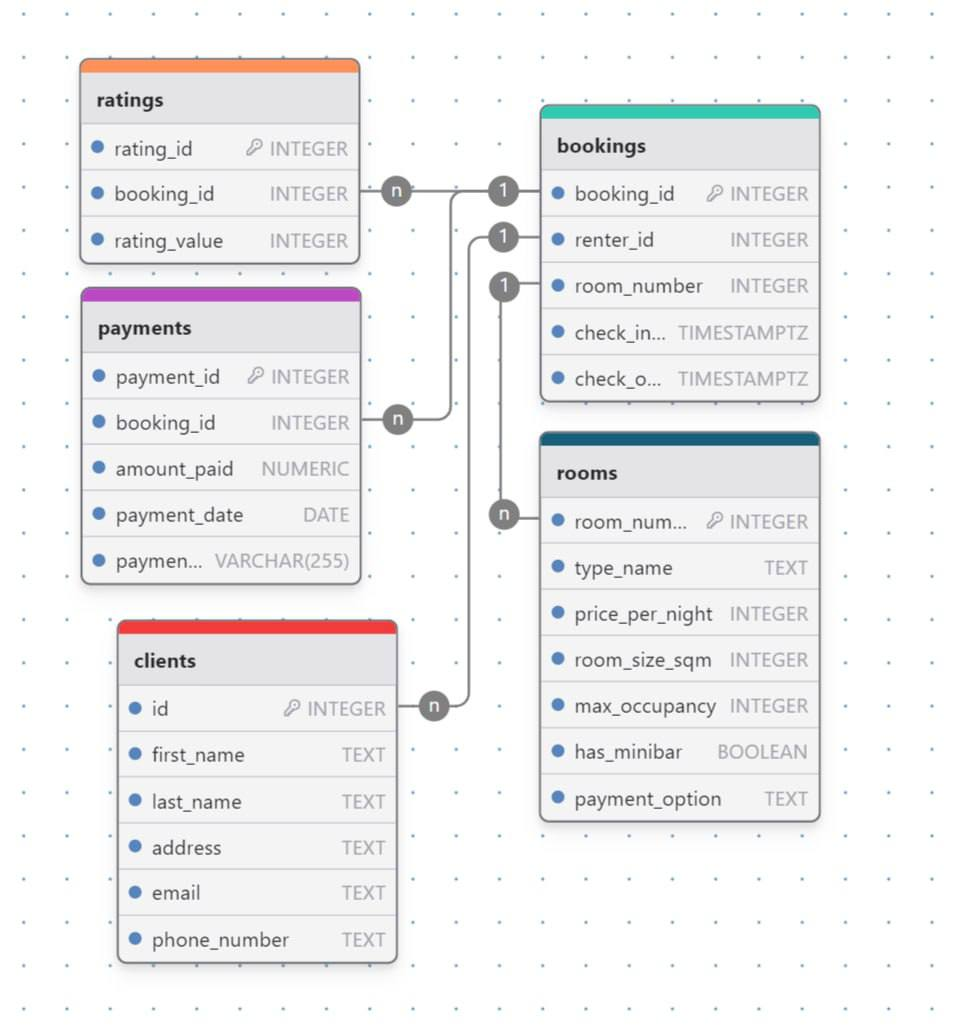

# DML

## Оператор SELECT

Это основной оператор для получения данных из базы. Вводить данные в запрос можно как строчными, так и заглавными буквами. Пробелы и табуляция не повлиляют на запрос. Язык SQL - функциональный, поэтому там нельзя просто так взять и создать объект. Зато можно "заселектить" его.

    SELECT 1
    
В результате выполнения этого запроса мы получили таблицу-выборку с единственным столбцом с автоматически сгенерированным названием и единственной строкой, содержащей в этом столбце 1. Давайте назовем столбец как-нибудь понятно (зададим alias для столбца):

    SELECT 25 AS number
    
Чтобы получить данные из некоторой таблицы, нужно ее указать в операторе `FROM`. Таблицы сгруппированы по схемам, по умолчанию у нас уже активирована дефолтная схема.




## Про схему

- **Схема** - это логическая структура, которая определяет организацию объектов базы данных. Схема включает в себя описание и отношения между различными объектами базы данных, такими как таблицы, представления, индексы, функции и другие.

Схема включает в себя описание и отношения между различными объектами базы данных, такими как таблицы, представления, индексы, функции и другие.

Каждая схема имеет уникальное имя в пределах базы данных и может содержать набор объектов, связанных с определенной предметной областью или функциональным блоком.

### Компоненты схемы:

1. **Таблицы**: определяют основную структуру данных, которая хранится в базе данных.
2. **Индексы**: используются для ускорения поиска данных в таблицах.
3. **Представления**: виртуальные таблицы, созданные на основе запросов к другим таблицам или представлениям.
4. **Процедуры и функции**: хранимые программы, которые могут выполнять операции с данными в базе данных.
5. **Права доступа и роли**: определяют уровни доступа к объектам схемы для пользователей и ролей.

### Основные аспекты схемы в SQL:

1. Структурная организация. Схема определяет структуру базы данных в терминах её объектов и их отношений друг к другу. Это включает в себя определения таблиц, столбцов и типов данных, а также ограничений (constraints) и отношений между таблицами (например, внешние ключи).

2. Пространство имен. Схема действует как пространство имен, которое позволяет однозначно идентифицировать каждый объект в базе данных. В больших системах, где может быть множество таблиц, представлений и других объектов, схемы помогают организовать их в логические группы, упрощая управление и доступ.

3. Безопасность. Схемы могут использоваться для управления доступом к данным. Права доступа могут быть назначены на уровне схемы, позволяя администраторам контролировать, кто может видеть или изменять данные в определенных объектах базы данных.

4. Логическая изоляция. В многопользовательской среде схемы позволяют разделять данные и объекты базы данных между различными пользователями или группами пользователей, обеспечивая логическую изоляцию и организацию данных.

В разных системах управления базами данных схемы могут реализовываться по-разному. Например, в некоторых СУБД, таких как PostgreSQL, схема является ключевым элементом архитектуры и активно используется для организации данных. В других, например в MySQL, аналогичная функциональность может достигаться через использование баз данных в качестве верхнего уровня организации, а схемы и базы данных могут рассматриваться как взаимозаменяемые понятия в контексте SQL команд.




## Оператор SELECT: выборка данных из таблиц

Получим данные обо всех номерах нашей гостиницы.

    SELECT * FROM rooms

Чтобы упорядочить поля результирующего набора или выбрать только часть из них, их следует перечислить через запятую:
    
    SELECT room_number, type_name, has_minibar, max_occupancy FROM rooms
    
Выборка может содержать дубликаты строк:

    SELECT type_name FROM rooms
    
В таком случае, если мы хотим просто вывести все возможные типы комнат, мы можем воспользоваться оператором DISTINCT, который убирает дубликаты из результирующей выборки:
    
    SELECT DISTINCT type_name FROM rooms
    

### Оператор ORDER BY

Отсортировать выборку можно, добавив предложение `ORDER BY` в текст запроса. Давайте отсортируем клиентов по фамилии в алфавитном порядке.

    SELECT
      last_name, first_name, email
    FROM clients
    ORDER BY last_name
    
Можно сортировать данные и по нескольким полям:

    SELECT
      last_name, first_name, email
    FROM clients
    ORDER BY last_name, first_name
    
В обратном порядке также можно сортировать - для этого используем ключевое слово DESC (от слова descending order):

    SELECT
      last_name, first_name, email
    FROM clients
    ORDER BY last_name DESC, first_name
    
Порядок сортировки DESC или ASC (ascending - по возрастанию - не обязательно указывать, т.к. он используется по умолчанию) применяется только для той колонки, для которой указан. В примере выше сортируем фамилии по убыванию, а имена внутри фамилий - по возрастанию.


Предложение `ORDER BY` можно сочетать с другими предложениями запроса SELECT:

    SELECT
      DISINCT type_name
    FROM rooms
    ORDER BY type_name

### Оператор LIMIT и OFFSET

Оператор **LIMIT** выбирает указанное количество строк из запроса. Оператор **OFFSET** используется с оператором **LIMIT** и задает сдвиг по выборке.

Например, выведем 5 самых дешевых номеров:

    SELECT room_number
    FROM rooms
    ORDER BY price_per_night
    LIMIT 5
    
Можем посмотреть по дешевизне номера со 2 по 6:

    SELECT room_number
    FROM rooms
    ORDER BY price_per_night
    LIMIT 5
    OFFSET 1
    
Часто на собеседованиях просят вывести самый топовый объект - например, тот же самый дорогой номер. Самый канонический и простой способ сделать это - использовать ORDER BY и LIMIT, как в предыдущем примере, но LIMIT 1.

    SELECT room_number
    FROM rooms
    ORDER BY price_per_night DESC
    LIMIT 1

    
## Оператор WHERE

Самый часто используемый оператор запроса выборки. Он фильтрует данные по заданному предикату. Выведем все номера, в которых максимальная вместимость - 3 человека.

    SELECT * FROM rooms WHERE max_occupancy = 3
    
Одинарное = здесь не опечатка: в SQL нет оператора ==.

Доступны и другие операторы сравнения:

    SELECT * FROM rooms WHERE max_occupancy > 3


    SELECT * FROM rooms WHERE max_occupancy >= 3
    
    
Доступны все классические операции сравнения:
- `<` (меньше)

- `=` (равно)

- `>` (больше)

- `>=` (больше или равно)

- `<=` (меньше или равно)

- `<>`, `!=` (не равно - можно использовать оба варианта оператора)

Выражения в предикатах сравнения могут содержать константы и любые поля из таблиц, указанных в предложении **FROM**.

### Фильтрация промежутков

- `BETWEEN … AND … ` - число в колонке должно входить в диапазон (включительно)

- `NOT BETWEEN … AND …` - не должно входить


    SELECT * FROM rooms WHERE max_occupancy BETWEEN 2 AND 4
    
    SELECT * FROM rooms WHERE max_occupancy NOT BETWEEN 2 AND 4
    
### Множественное совпадение
   
- `IN (..., ...)` - значение колонки входит в список

- `NOT IN (..., ...)` - не входит


    SELECT * FROM rooms WHERE max_occupancy IN (2, 3, 4)
    
    SELECT * FROM rooms WHERE max_occupancy NOT IN (2, 3, 4)
    
    
### Предикаты для строковых колонок

Основное предложение для работы со строками - `LIKE`. Аргументом ему подается регулярка, которой должна соответствовать строка.

- `LIKE 'abc%'` - любые строки, начинающиеся с «abc»
- `LIKE 'abc_' ` - любые строки, начинающиеся с «abc», длиной 4 символа
- `LIKE '%z' ` - любые строки, заканчивающиеся символом z
- `LIKE '%abc%'` - любые строки, в середине которых есть «abc»
- `LIKE '% % %`' - любые строки, в которых есть не меньше двух отдельных пробелов

Выведем всех клиентов, фамилия которых начинается на букву П.

    SELECT last_name, first_name FROM clients WHERE last_name LIKE 'П%'


### Совокупность условий

Стандартные логические И и ИЛИ - операторы `AND` и `OR`.

    SELECT * FROM rooms WHERE price_per_night >= 3000 AND room_size_sqm >= 30


## Про NULL

Если значение колонки не заполнено для какой-то строки, то оно является `NULL` - это аналог None в питоне. Но есть нюанс: NULL никогда не равен NULL, поэтому сравнение с NULL всегда нужно проводить через конструкцию `IS [NOT] NULL`.


    SELECT
      last_name, first_name, email, phone_number
    FROM clients
    WHERE email IS NULL OR phone_number IS NULL


    SELECT
      last_name, first_name, email, phone_number
    FROM clients
    WHERE NULL = NULL

    
## Группировка и агрегация данных

**Агрегация** — это способ преобразования набора данных в одно результирующее значение. Типичные примеры - подсчет среднего значения, медианы, суммы всех значений и т.д.

Приведем пример наиболее популярных агрегирующих функций в SQL:

- `COUNT(*)` - подсчет количества строк в результирующей выборке
- `COUNT()` - подсчет не пропущенных значений в столбце выборки (тех значений, которые не являются NULL)
- `AVG()` - среднее арифметическое по всем значениям столбца выборки
- `SUM()` - сумма значений столбца выборки
- `MIN()` - выбор минимального значения в столбце в выборке
- `MAX()` - выбор максимального значения в столбце в выборке

Посмотрим, сколько всего клиентов записано в нашей БД:

    SELECT COUNT(*) FROM clients
    
И сразу рассмотрим разницу операторов `COUNT` со звездой (`*`) и с колонкой. Посчитаем, сколько всего у нас клиентов в базе и у скольких из них сохранены телефон и электронная почта:

    SELECT
      COUNT(*) as all_count,
      COUNT(email) as email_count,
      COUNT(phone_number) as phone_count
    FROM clients
    
Когда прошла самая первая оплата:

    SELECT MIN(payment_date) as min_payment_dt FROM payments

Чаще всего нам интересны статистики не по полной таблице, а по каким-то группам данных. Например, мы можем захотеть узнать, сколько денег получила наша гостиница по каждому из дней. Для создания групп используется оператор `GROUP BY`:

    SELECT SUM(amount_paid)
    FROM payments
    GROUP BY payment_date
    
Конечно, чаще нас интересует информация по конкретным дням, например, за месяц. В этом случае можем использовать `GROUP BY` совместно с `WHERE`. Порядок операторов в запросе важен!

    SELECT SUM(amount_paid)
    FROM payments
    WHERE payment_date BETWEEN '2024-01-01' AND '2024-01-31'
    GROUP BY payment_date

Оператор `WHERE` умеет работать только со статичными условиями - теми, которые не надо считать на ходу. Если мы хотим отфильтровать группы по значению результата выполнения агрерирующей функции, то следует использовать оператор `HAVING`. Здесь также важен порядок следования операторов. Выберем дни, в которые выручка была более 30000 рублей.

    SELECT SUM(amount_paid) as income
    FROM payments
    GROUP BY payment_date
    HAVING income > 30000
    
Эту конструкцию также можно использовать и при обычном условии WHERE - например, отфильтруем те же прибыльные дни, но за период.

    SELECT SUM(amount_paid) as income
    FROM payments
    WHERE payment_date BETWEEN '2024-01-01' AND '2024-01-31'
    GROUP BY payment_date
    HAVING income > 30000
    
Кстати говоря, даже запросы с таким большим количеством условий и группировок можно сортировать:

    SELECT SUM(amount_paid) as income
    FROM payments
    WHERE payment_date BETWEEN '2024-01-01' AND '2024-01-31'
    GROUP BY payment_date
    HAVING income > 30000
    ORDER BY income DESC
    
    
## Оконные функции

Важное требование к оператору `GROUP BY` - это то, что в результирующей выборке могут остаться только:

- поля группировки
- значения агрегирующих функций

Но иногда нам нужно сделать обычную выборку из таблицы, присоединив к ней колонку со значением агрегата. Для этого применяются оконные функции. Оконки требуют наличия следующих операторов:

1. `OVER` – говорит о том, что сейчас в коде запроса будет оконка.
2. `PARTITION BY` – аналог оператора GROUP BY в оконке, в котором перечисляются колонки для группировки
3. `ORDER BY` – необязательный аргумент, который задает, по каким полям внутри оконки сортировать данные.

Выведем такую выборку:
- идентификатор клиента
- номер комнаты, в которой он жил
- дата заезда
- дата выезда
- дата самого первого заезда этого клиента в наш отель
- сколько бронирований было сделано этим клиентом
- сколько раз этим клиентом был забронирован именно этот номер

    SELECT
      renter_id,
      room_number,
      check_in_date,
      check_out_date,
      MIN(check_in_date) OVER (PARTITION BY renter_id) first_check_in_date,
      COUNT(*) OVER (PARTITION BY renter_id) client_bookings,
      COUNT(*) OVER (PARTITION BY renter_id, room_number) client_x_room_count
    FROM bookings
    
Есть три типа оконных функций:

1. Агрегирующие - те же, которые мы рассмотрели выше: `SUM`, `COUNT`, `AVG`, `MIN`, `MAX` и др.
2. Ранжирующие - это те, которые показывают положение строки в выборке:

  - `ROW_NUMBER` - номер строки в выборке
  - `RANK` - ранг строки в выборке. Отличие от номера в том, что номер всегда уникален, а ранг - это номер группы, состоящей из одинаковых значений.
  - `DENSE_RANK` - тоже ранг, но в случае одинаковых значений не пропускает следующий числовой ранг, а идет последовательно

3. Функции смещения - возвращают значение этой же колонки из предыдущей, следующей или любой другой указанной строки

- `LAG()` - предыдущее значение столбца с учетом сортировки ORDER BY
- `LEAD()` - следующее значение столбца с учетом сортировки ORDER BY
- `FIRST_VALUE()` - первое значение столбца в указанной группе
- `LAST_VALUE()` - последнее значение столбца в указанной партиции
- `NTH_VALUE(,n)` - n-ое значение в упорядоченном наборе значений из аналитического окна


Выведем информацию о бронированиях, указав, какое по счету это бронирование для каждого клиента.


    SELECT
      renter_id,
      room_number,
      check_in_date,
      check_out_date,
      ROW_NUMBER() OVER (PARTITION BY renter_id ORDER BY check_in_date) booking_number
    FROM bookings


Выведем информацию о бронированиях, указав, в каком номере останавливался клиент в прошлый раз (если это не первое бронирование этого клиента в отеле).

    SELECT
      renter_id,
      room_number,
      check_in_date,
      check_out_date,
      LAG() OVER (PARTITION BY renter_id ORDER BY check_in_date) previous_room_number
    FROM bookings
    
    
## Операторы CASE WHEN

Если нам нужно вывести какое-то значение в зависимости от значения колонки в строке, можем использовать парный оператор `CASE` - `WHEN` - `ELSE`. Выведем названия категорий номеров по стоимости.

    SELECT
        room_number,
        price_per_night,
        CASE
            WHEN price_per_night > 5000 THEN 'Дорогой номер'
            WHEN price_per_night > 2500 AND price_per_night <= 5000 THEN 'Нормальный номер'
            ELSE 'Дешевый номер'
        END as room_price_category
    FROM rooms


## Источники

- https://thecode.media/mysql-uroot-p/
- https://sites.google.com/site/raznyeurokipoinformatiki/home/bazy-dannyh/teoria-po-bazam-dannyh/klassifikacia-baz-dannyh-po-srede-hranenia
- http://www.sql-tutorial.ru/ru/book_sql_dml.html